In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

df = pd.read_csv('UniversityUtah_AirPollution.csv')   
col_names = [ 'PM1', 'PM2_5','PM10','MicsRED', 'MicsNOX', 'MicsHeater', 'Temperature', 'Humidity', 'OZONE']   


In [ ]:
df.tail()

,year_month_day_hour,DeviceID,PM1,PM2_5,PM10,MicsRED,MicsNOX,MicsHeater,Temperature,Humidity,OZONE
521995,2021-05-19 23:00:00+00:00,F45EAB81C274,0.205915,0.730407,1.469119,1050.423729,721.406780,0.0,40.085932,54.898814,51.0
521996,2021-05-19 23:00:00+00:00,F45EAB95E889,0.000000,0.011400,0.102267,1248.750000,1871.983333,1.0,40.175500,29.905667,51.0
521997,2021-05-19 23:00:00+00:00,F45EAB9BDDC0,0.061695,0.366034,0.588780,796.305085,651.542373,0.0,39.048814,23.101356,51.0
521998,2021-05-19 23:00:00+00:00,606405C9517E,0.446828,0.663034,0.721172,1229.155172,1329.603448,0.0,45.162931,29.113103,51.0
521999,2021-05-19 23:00:00+00:00,9884E31FE809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0


In [ ]:
df['year_month_day_hour'] = df['year_month_day_hour'].str[:-6]

In [ ]:
df.tail()

,year_month_day_hour,DeviceID,PM1,PM2_5,PM10,MicsRED,MicsNOX,MicsHeater,Temperature,Humidity,OZONE
521995,2021-05-19 23:00:00,F45EAB81C274,0.205915,0.730407,1.469119,1050.423729,721.406780,0.0,40.085932,54.898814,51.0
521996,2021-05-19 23:00:00,F45EAB95E889,0.000000,0.011400,0.102267,1248.750000,1871.983333,1.0,40.175500,29.905667,51.0
521997,2021-05-19 23:00:00,F45EAB9BDDC0,0.061695,0.366034,0.588780,796.305085,651.542373,0.0,39.048814,23.101356,51.0
521998,2021-05-19 23:00:00,606405C9517E,0.446828,0.663034,0.721172,1229.155172,1329.603448,0.0,45.162931,29.113103,51.0
521999,2021-05-19 23:00:00,9884E31FE809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0


In [ ]:
for col in df:
      print(col +': '+ np.str(df[col].isna().sum()))

year_month_day_hour: 0
DeviceID: 0
PM1: 105006
PM2_5: 105006
PM10: 105006
MicsRED: 105006
MicsNOX: 105006
MicsHeater: 105006
Temperature: 105006
Humidity: 105006
OZONE: 149750


<ipython-input-84-c00ccb3d6175>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(col +': '+ np.str(df[col].isna().sum()))


In [ ]:
# dropping the rows having NaN values
df = df.dropna()

In [ ]:
df.drop('year_month_day_hour', axis=1, inplace=True)
df.drop('DeviceID', axis=1, inplace=True)



In [ ]:
df.columns = col_names

In [ ]:
df=df[24:]

In [ ]:
df.to_csv('Utahpollution.csv') # save new CSV

In [ ]:
df1 = pd.read_csv('Utahpollution.csv', header=0, index_col=0)
df1.describe()

,PM1,PM2_5,PM10,MicsRED,MicsNOX,MicsHeater,Temperature,Humidity,OZONE
count,285285.000000,285285.000000,285285.000000,285285.000000,285285.000000,285285.000000,285285.000000,285285.000000,285285.000000
mean,2.810539,4.403536,4.987778,1106.380630,974.108021,0.057177,23.164541,38.283068,27.819847
std,5.695436,8.619773,9.637063,176.140094,405.503744,0.187513,10.525003,18.731449,15.958332
min,0.000000,0.000000,0.000000,463.039474,19.642857,0.000000,-2.240833,1.870779,0.000000
25%,0.008208,0.164683,0.325027,987.203390,668.700000,0.000000,14.723457,25.220667,15.000000
50%,0.659119,1.366068,1.678925,1122.810811,960.293333,0.000000,21.162333,34.137568,28.000000
75%,3.006475,4.714650,5.302442,1233.402778,1260.987654,0.000000,30.787037,45.895370,39.000000
max,91.531200,141.418857,165.024571,4095.000000,2990.800000,1.000000,69.994561,99.990667,89.000000


In [ ]:
df1.tail(15)

,PM1,PM2_5,PM10,MicsRED,MicsNOX,MicsHeater,Temperature,Humidity,OZONE
521978,0.085949,1.211983,1.434661,922.322034,798.016949,0.0,36.607288,14.010169,51.0
521980,0.554797,1.035220,1.304322,1295.728814,1278.830508,0.0,38.509661,30.360339,51.0
521981,0.027322,0.297051,0.486525,1198.389831,1013.423729,0.0,36.069322,23.973051,51.0
521982,7.410050,9.603667,10.075083,1093.566667,648.716667,0.0,37.814000,17.816000,51.0
521985,0.000000,0.002967,0.024500,1239.850000,971.483333,0.0,38.715833,20.323833,51.0
521986,0.036900,0.330117,0.538283,917.933333,1116.250000,0.0,36.333667,18.756000,51.0
521988,0.219167,0.627907,1.083056,1228.129630,1313.574074,0.0,37.209259,22.051481,51.0
521989,0.046050,0.352200,0.494917,918.783333,426.733333,0.0,40.568833,42.079667,51.0
521991,0.250576,0.607576,0.978712,1118.355932,1039.830508,0.0,39.496102,20.287119,51.0
521992,0.035814,0.200881,0.331780,1277.559322,1621.661017,0.0,38.819831,14.432373,51.0


In [ ]:
dataset_columns = df1.columns.tolist()
dataset_columns

['PM1',
 'PM2_5',
 'PM10',
 'MicsRED',
 'MicsNOX',
 'MicsHeater',
 'Temperature',
 'Humidity',
 'OZONE']

<AxesSubplot:>

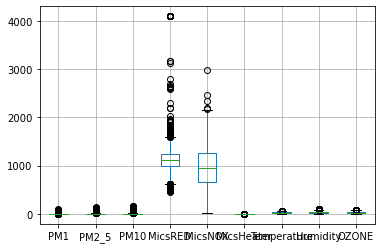

In [ ]:
#Box plot
#pd.options.display.mpl_style = False
df1.boxplot()

In [ ]:
df1

,PM1,PM2_5,PM10,MicsRED,MicsNOX,MicsHeater,Temperature,Humidity,OZONE
124176,1.734934,2.413750,2.528842,1278.302632,1465.539474,0.0,38.630526,27.253421,61.0
124177,1.278320,1.970280,2.191600,1258.813333,1065.986667,0.0,42.474800,24.406400,61.0
124178,0.397707,2.442317,2.546012,835.536585,987.329268,0.0,38.917561,25.950488,61.0
124179,0.007419,0.046405,0.076378,1220.675676,1854.540541,0.0,40.287973,23.295405,61.0
124180,1.887872,2.374846,2.543885,1293.769231,1775.923077,0.0,44.999231,36.470128,61.0
...,...,...,...,...,...,...,...,...,...
521994,0.055948,0.286845,0.591948,1379.931034,923.120690,0.0,44.935690,57.329310,51.0
521995,0.205915,0.730407,1.469119,1050.423729,721.406780,0.0,40.085932,54.898814,51.0
521996,0.000000,0.011400,0.102267,1248.750000,1871.983333,1.0,40.175500,29.905667,51.0
521997,0.061695,0.366034,0.588780,796.305085,651.542373,0.0,39.048814,23.101356,51.0


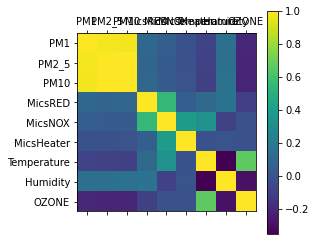

In [ ]:
#Analysing relationship between different features
cor_cols = dataset_columns
plt.matshow(df1.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df1.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
values[:,4]

array([211178., 143510., 127530., ..., 241628.,  59795., 192575.],
      dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (285281, 1)
X (285281, 4, 9)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (276521, 4, 9)
X_test (8760, 4, 9)
Y_train (276521, 1)
Y_test (8760, 1)


In [ ]:
!pip install tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=680aaab94142ce8d47fb3505eccba9b607a597514e182fa8aad8c167ca5fb3d0
  Stored in directory: c:\users\kuldeep.kumar\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


In [ ]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')   

In [ ]:
#Train the model
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
8642/8642 [==============================] - 94s 10ms/step - loss: 0.0012
Epoch 2/20
8642/8642 [==============================] - 90s 10ms/step - loss: 0.0011
Epoch 3/20
8642/8642 [==============================] - 87s 10ms/step - loss: 0.0010
Epoch 4/20
8642/8642 [==============================] - 123s 14ms/step - loss: 9.9515e-04
Epoch 5/20
8642/8642 [==============================] - 111s 13ms/step - loss: 9.6446e-04
Epoch 6/20
8642/8642 [==============================] - 124s 14ms/step - loss: 9.5263e-04
Epoch 7/20
8642/8642 [==============================] - 110s 13ms/step - loss: 9.3708e-04
Epoch 8/20
8642/8642 [==============================] - 120s 14ms/step - loss: 9.1889e-04
Epoch 9/20
8642/8642 [==============================] - 124s 14ms/step - loss: 9.0848e-04
Epoch 10/20
8642/8642 [==============================] - 108s 13ms/step - loss: 8.9273e-04
Epoch 11/20
8642/8642 [==============================] - 116s 13ms/step - loss: 8.7515e-04
Epoch 12/20
8642/8642 [

In [ ]:
#Taking predictions
from keras.models import load_model
model.save('UttaPollutionmodel.h5')

In [ ]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

274/274 [==============================] - 4s 3ms/step


0.019161826

In [ ]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 9)
scaled Values shape (285285, 9)


In [ ]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 9)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [ ]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

1.7539047

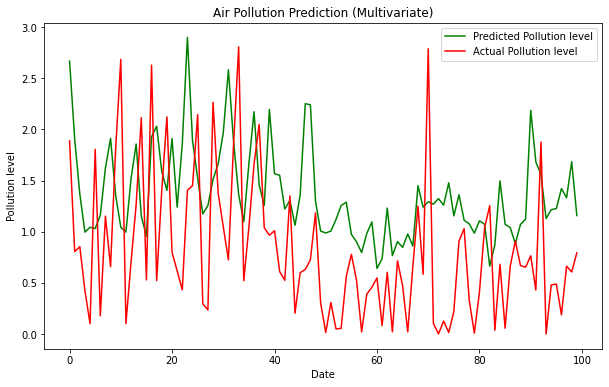

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)

MAPE inf


<ipython-input-116-09b064d08334>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 1.7539047
Mean of Test data  1.1245531
